In [34]:
from generate_samples import SyntheticDAG
from models.causal_peeler_oracle import identify
from models.noise_estimator import estimate_noise

from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

import torch
import matplotlib.pyplot as plt

In [35]:
plt.rcParams.update({'font.size': 18})

In [36]:
def PolynomialInstance(degree=2):
    return Pipeline([
        ('poly_features', PolynomialFeatures(degree=degree)),
        ('linear_regression', LinearRegression())
    ])

# Simulation on the Line Graph

In [37]:
DAG_type = 'line'
num_latent = 4
num_samples = 2000

graph = SyntheticDAG(num_latent, DAG_type)
G = torch.empty(4, 4).uniform_(-1, 1)

In [38]:
U, X, N = graph.sample_scaled(G, num_samples)

In [39]:
U_estimates, layers = identify(graph, U, G)
N_estimates = estimate_noise(U_estimates, layers, PolynomialInstance)

-----------------------------------------------------------
Removing Layer 0.
-----------------------------------------------------------
Calculating Jacobian Estimates...
Done.

Finding Optimal G_hat...
Set parameter NonConvex to value 2


INFO:gurobipy:Set parameter NonConvex to value 2


Optimal solution found:
[ 0.4938168  -0.72984477 -0.05793614 -0.46916412]

No feasible solution found.
Done.

Peeled off 1 nodes.
-----------------------------------------------------------
Removing Layer 1.
-----------------------------------------------------------
Calculating Jacobian Estimates...
Done.

Finding Optimal G_hat...
Set parameter NonConvex to value 2


INFO:gurobipy:Set parameter NonConvex to value 2


Optimal solution found:
[ 0.66556212 -0.74131849  0.08645207]

No feasible solution found.
Done.

Peeled off 1 nodes.
-----------------------------------------------------------
Removing Layer 2.
-----------------------------------------------------------
Calculating Jacobian Estimates...
Done.

Finding Optimal G_hat...
Set parameter NonConvex to value 2


INFO:gurobipy:Set parameter NonConvex to value 2


Optimal solution found:
[-0.76749513  0.64105478]

No feasible solution found.
Done.

Peeled off 1 nodes.
-----------------------------------------------------------
Removing Layer 3.
-----------------------------------------------------------
Calculating Jacobian Estimates...
Peeled off 1 nodes.


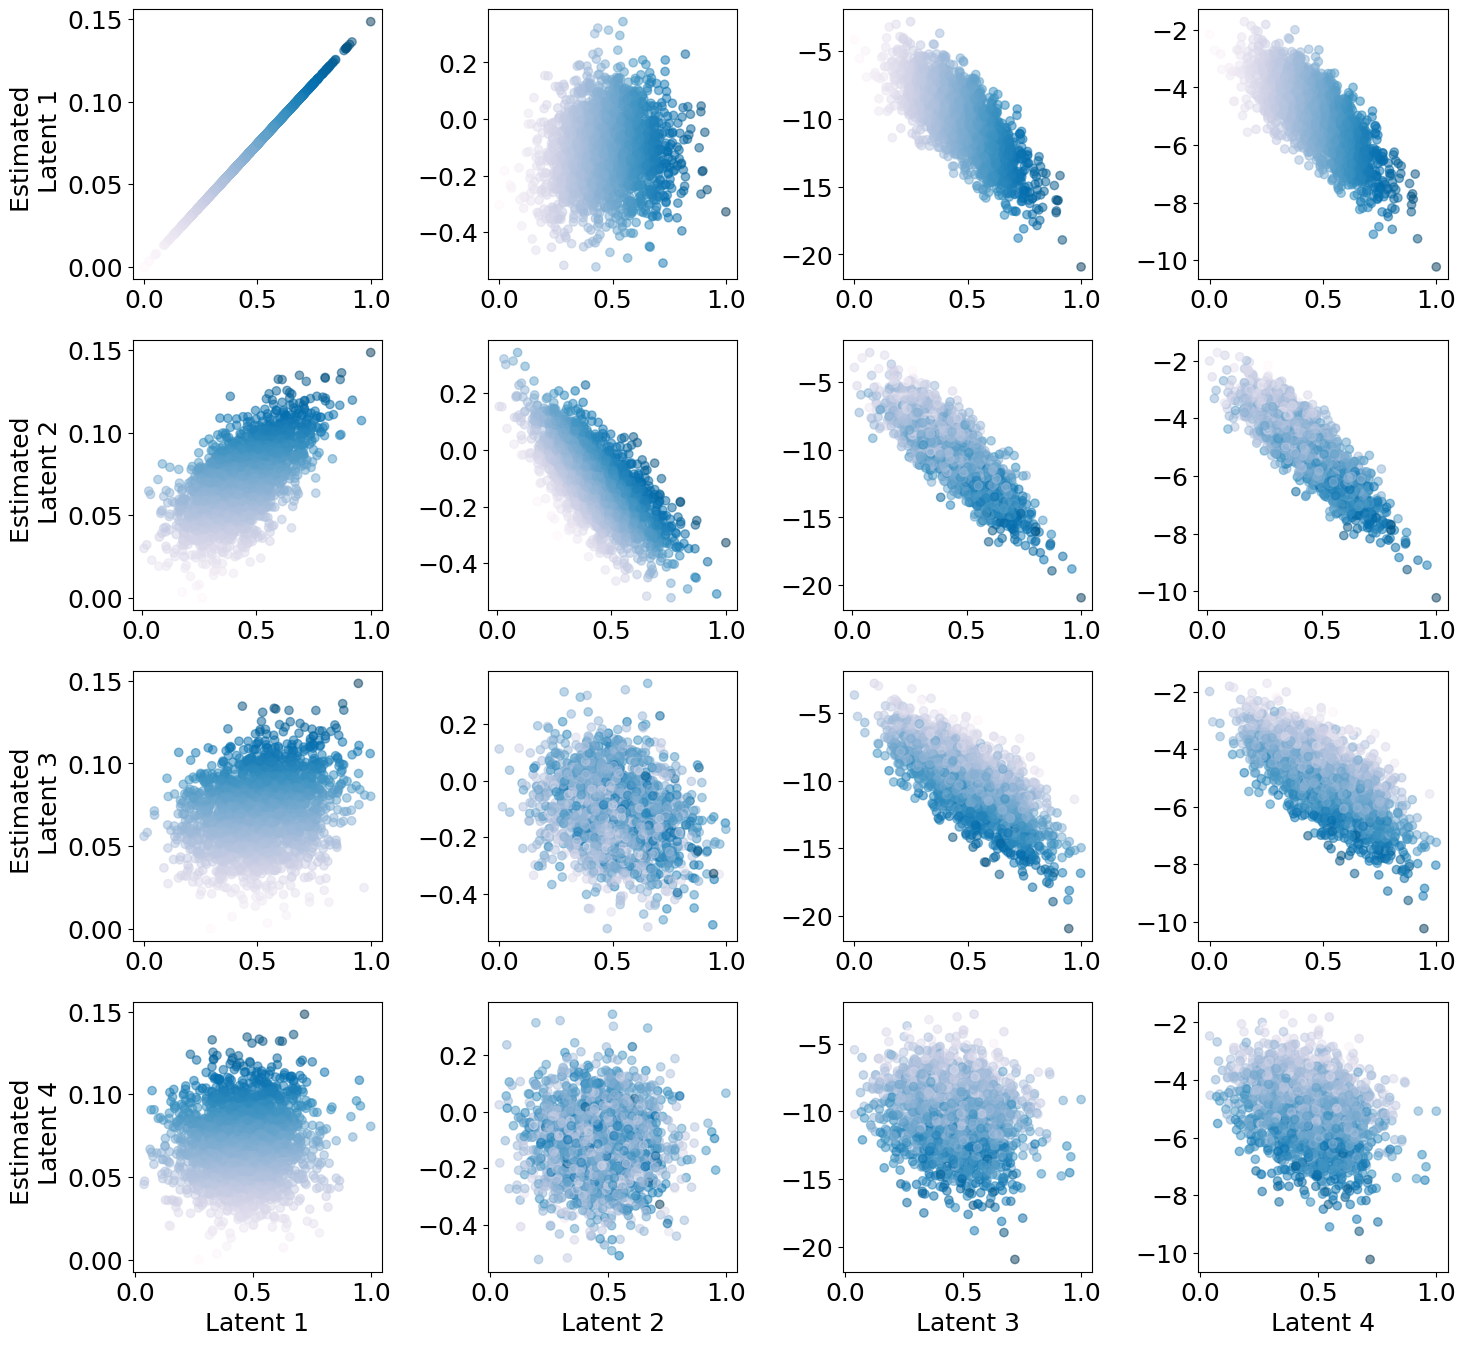

In [40]:
U_np = U.detach().numpy()
fig, axes = plt.subplots(nrows=num_latent, ncols=num_latent, figsize=(15, 15))
for i in range(num_latent):
    for j in range(num_latent):
        ax = axes[i, j]
        ax.scatter(U_np[:, i], U_estimates[:, j], alpha=0.5,  c = U_np[:,0], cmap='PuBu')
        if j==0:
            ax.set_ylabel(f'Estimated \n Latent {i+1}')
        if i==num_latent-1:
            ax.set_xlabel(f'Latent {j+1}')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

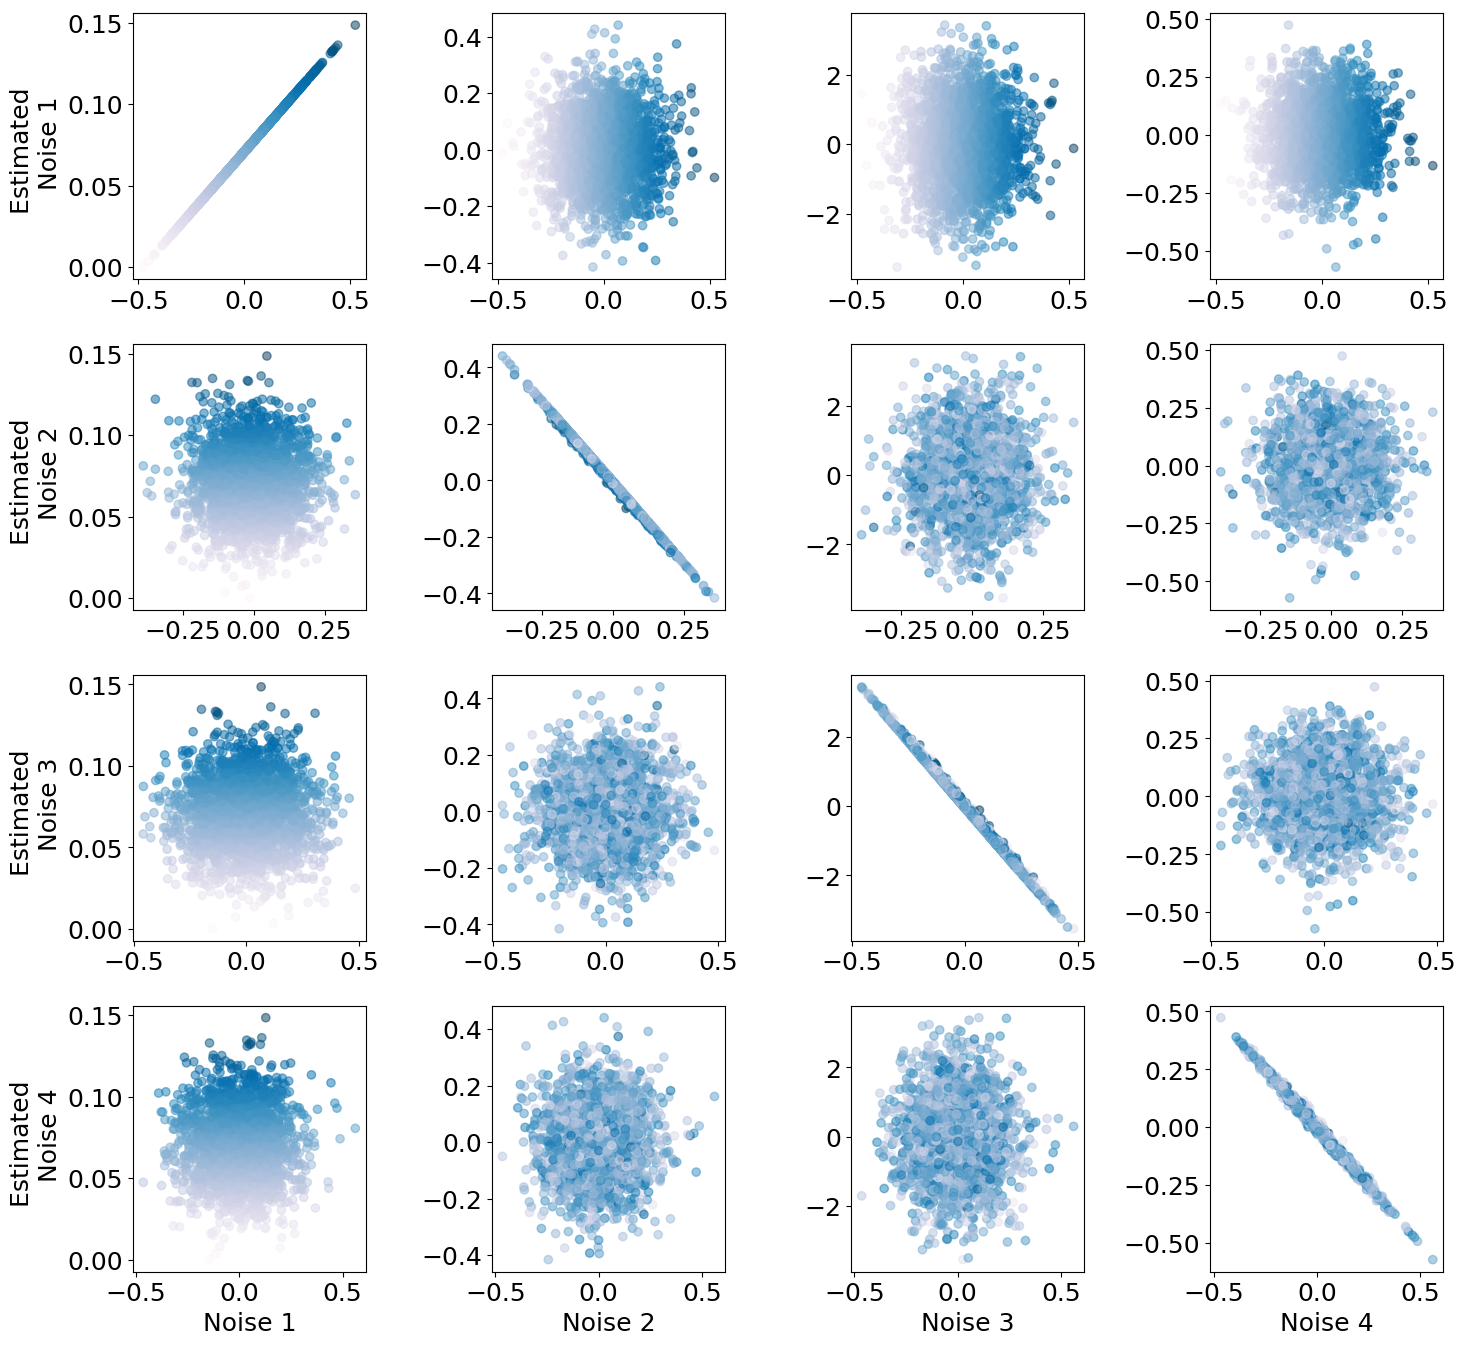

In [41]:
N_np = N.detach().numpy()
fig, axes = plt.subplots(nrows=num_latent, ncols=num_latent, figsize=(15, 15))
for i in range(num_latent):
    for j in range(num_latent):
        ax = axes[i, j]
        ax.scatter(N_np[:, i], N_estimates[:, j], alpha=0.5,  c = U_np[:,0], cmap='PuBu')
        if j==0:
            ax.set_ylabel(f'Estimated \n Noise {i+1}')
        if i==num_latent-1:
            ax.set_xlabel(f'Noise {j+1}')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Simulation on the Y-Structure Graph

In [42]:
DAG_type = 'line'
num_latent = 4
num_samples = 2000

graph = SyntheticDAG(num_latent, DAG_type)
graph.DAG.add_arc(1,3)
graph.DAG.remove_arc(2,3)
G = torch.empty(4, 4).uniform_(-1, 1)

In [43]:
U, X, N = graph.sample_scaled(G, num_samples)

In [44]:
U_estimates, layers = identify(graph, U, G)
N_estimates = estimate_noise(U_estimates, layers, PolynomialInstance)

-----------------------------------------------------------
Removing Layer 0.
-----------------------------------------------------------
Calculating Jacobian Estimates...
Done.

Finding Optimal G_hat...
Set parameter NonConvex to value 2


INFO:gurobipy:Set parameter NonConvex to value 2


Optimal solution found:
[0.51553844 0.31392445 0.46030467 0.65099245]

Optimal solution found:
[ 0.48574543 -0.87345796  0.00475511  0.03316562]

No feasible solution found.
Done.

Peeled off 2 nodes.
-----------------------------------------------------------
Removing Layer 1.
-----------------------------------------------------------
Calculating Jacobian Estimates...
Done.

Finding Optimal G_hat...
Set parameter NonConvex to value 2


INFO:gurobipy:Set parameter NonConvex to value 2


Optimal solution found:
[-0.80173796  0.5976757 ]

No feasible solution found.
Done.

Peeled off 1 nodes.
-----------------------------------------------------------
Removing Layer 2.
-----------------------------------------------------------
Calculating Jacobian Estimates...
Peeled off 1 nodes.


In [47]:
layers

[[0, 1], [2], [3]]

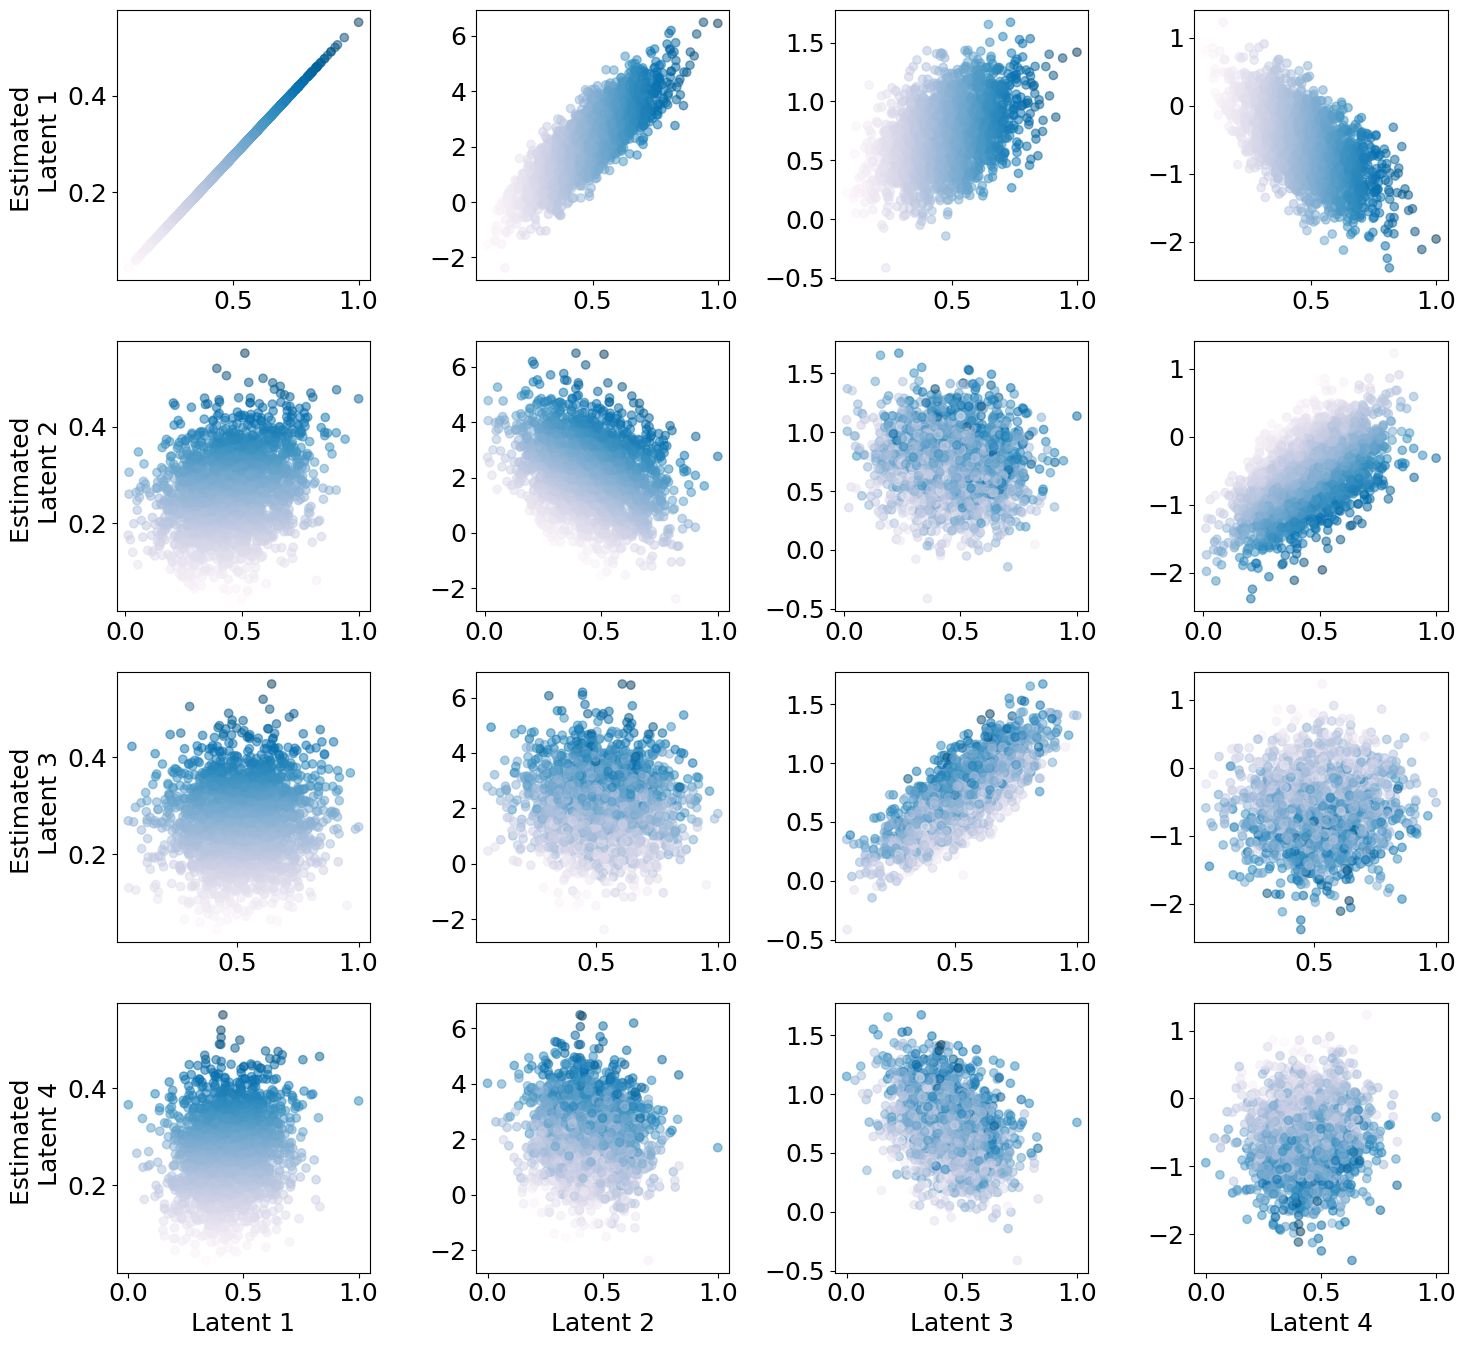

In [45]:
U_np = U.detach().numpy()
fig, axes = plt.subplots(nrows=num_latent, ncols=num_latent, figsize=(15, 15))
for i in range(num_latent):
    for j in range(num_latent):
        ax = axes[i, j]
        ax.scatter(U_np[:, i], U_estimates[:, j], alpha=0.5,  c = U_np[:,0], cmap='PuBu')
        if j==0:
            ax.set_ylabel(f'Estimated \n Latent {i+1}')
        if i==num_latent-1:
            ax.set_xlabel(f'Latent {j+1}')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

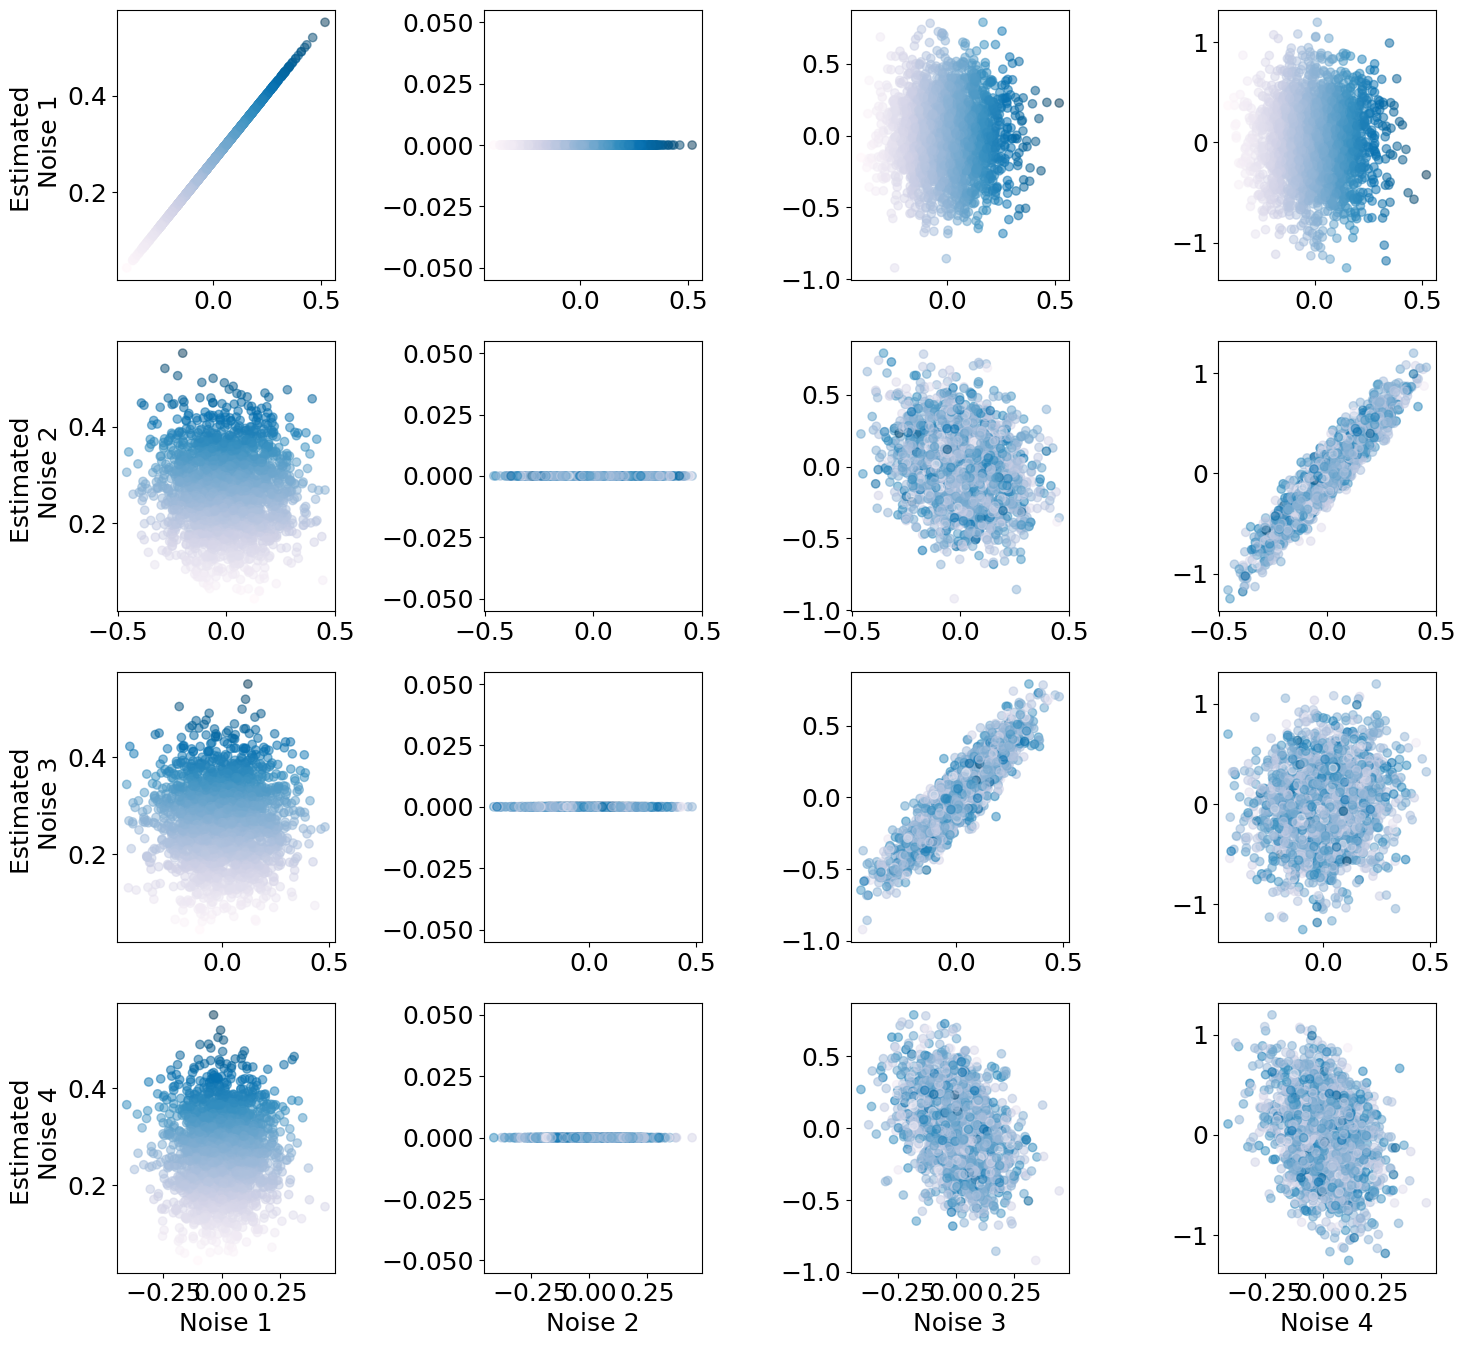

In [46]:
N_np = N.detach().numpy()
fig, axes = plt.subplots(nrows=num_latent, ncols=num_latent, figsize=(15, 15))
for i in range(num_latent):
    for j in range(num_latent):
        ax = axes[i, j]
        ax.scatter(N_np[:, i], N_estimates[:, j], alpha=0.5,  c = U_np[:,0], cmap='PuBu')
        if j==0:
            ax.set_ylabel(f'Estimated \n Noise {i+1}')
        if i==num_latent-1:
            ax.set_xlabel(f'Noise {j+1}')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()